# notebooks/eda-creditcard.ipynb
# Exploratory Data Analysis - Anonymized Credit Card Fraud Dataset
## Adey Innovations Inc. – 10 Academy Week 5&6 Fraud Detection Challenge
**Author:** Bereket Feleke  
**Date:** 23 December 2025

### Objective
Perform comprehensive EDA on the anonymized credit card fraud dataset to complete Task 1 requirements for the second dataset:
- Class imbalance analysis
- Transaction amount and time patterns
- Distribution of anonymized features (V1–V28)
- Key insights for modeling

All plots are saved for the interim report.

###  Introduction

This notebook performs EDA on the **anonymized credit card dataset** (`creditcard.csv`) — the second dataset in Task 1.

**Features**:
- `Time`: Seconds from first transaction
- `Amount`: Transaction amount
- `V1`–`V28`: PCA-transformed features (anonymized for privacy)
- `Class`: 1 = fraud, 0 = legitimate
  
**Goal**: Confirm imbalance, analyze Amount/Time, explore V features.


## 1. Setup and Libraries

**What this does**: Loads tools and ensures plots appear and are saved.

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# Create folder for saved figures
os.makedirs("../reports/figures", exist_ok=True)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 150  # High quality for report

print("Setup complete – ready for EDA!")

Setup complete – ready for EDA!


3. Load Data

## 2. Load the Dataset

**What this does**: Loads the credit card fraud dataset from the correct path.

In [11]:
# Load credit card data
df = pd.read_csv("../data/raw/creditcard.csv")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Fraud cases: {df['Class'].sum()}")
df.head()

Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Fraud cases: 492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Class Imbalance Analysis

**What this does**: Quantifies and visualizes the extreme class imbalance.

Fraud rate: 0.173% (492 fraud cases)


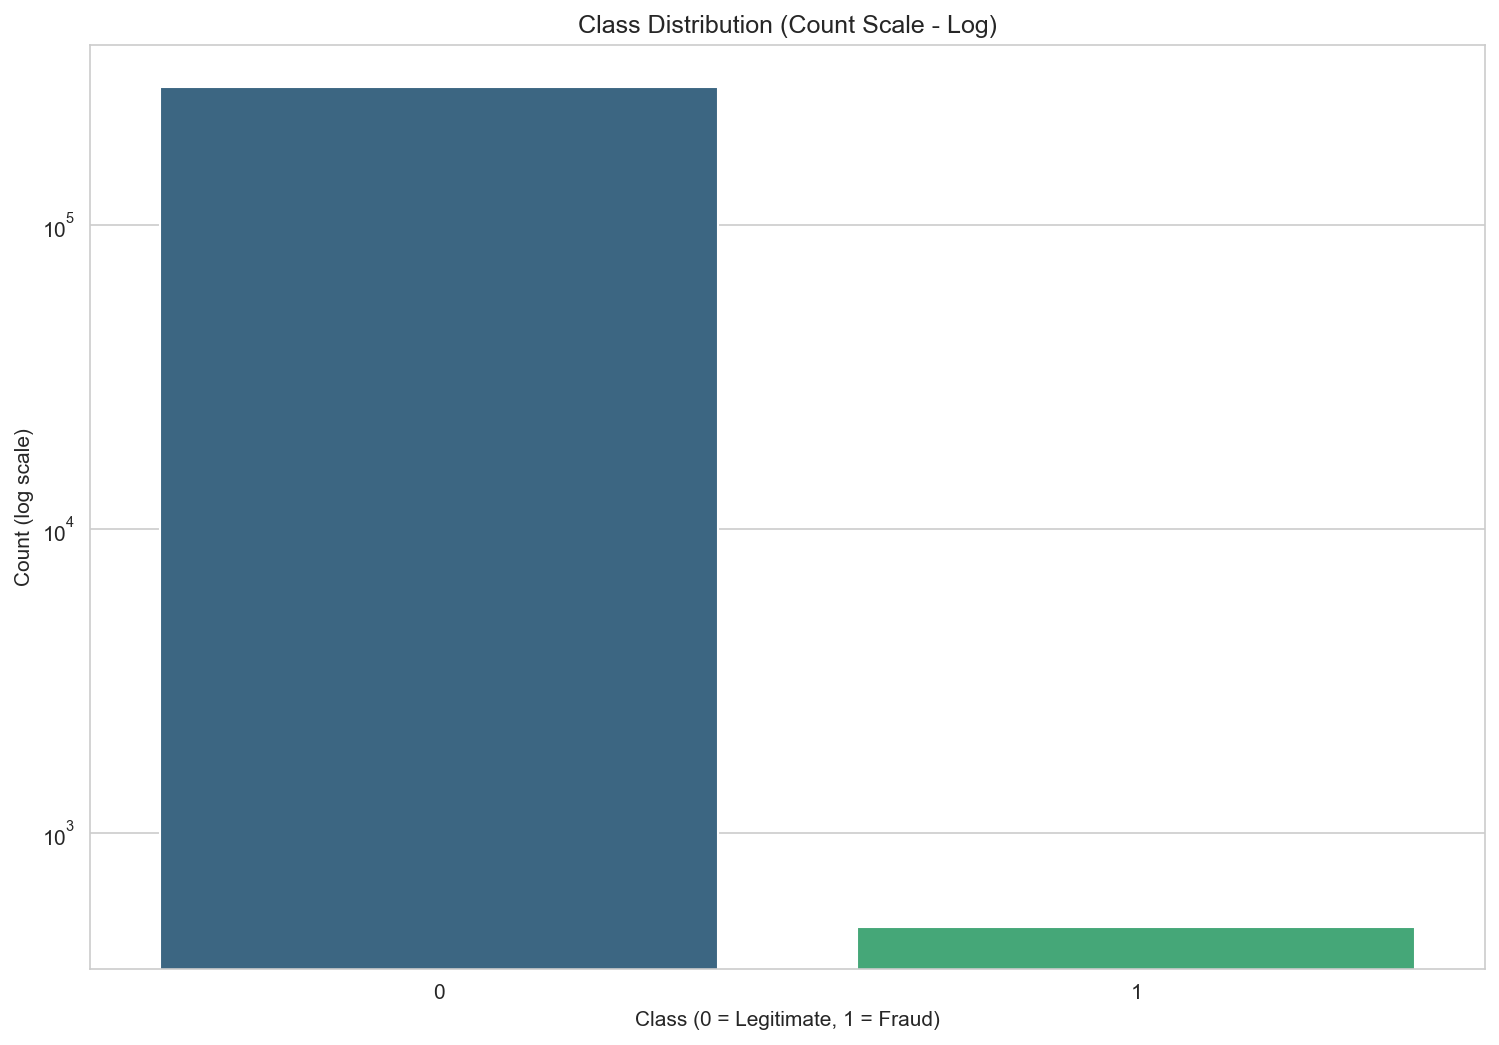

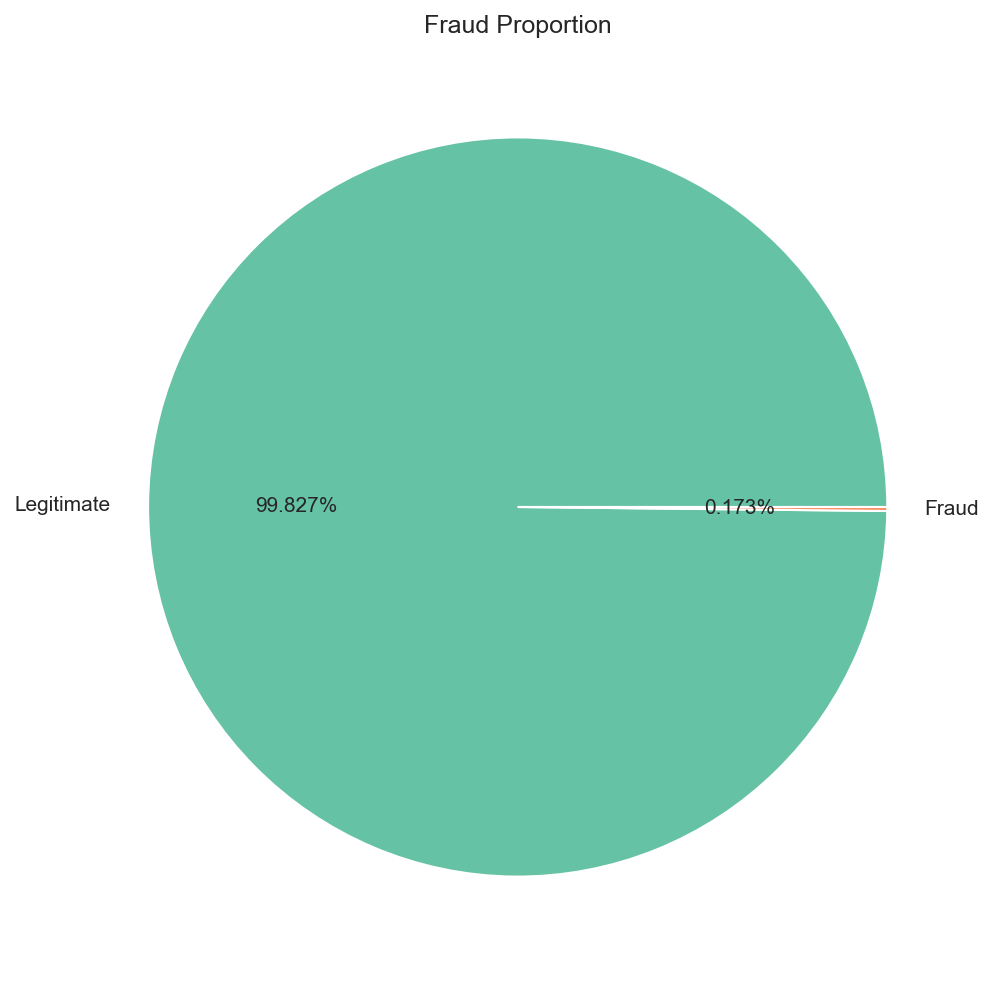

In [12]:
# Fraud rate
fraud_rate = df['Class'].mean() * 100
print(f"Fraud rate: {fraud_rate:.3f}% ({df['Class'].sum()} fraud cases)")

# Count plot
plt.figure()
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (Count Scale - Log)')
plt.yscale('log')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Count (log scale)')
plt.savefig("../reports/figures/cc_class_distribution_count.png", bbox_inches='tight', dpi=200)
plt.show()

# Pie chart
plt.figure()
plt.pie(df['Class'].value_counts(), labels=['Legitimate', 'Fraud'], autopct='%1.3f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Fraud Proportion')
plt.savefig("../reports/figures/cc_fraud_proportion.png", bbox_inches='tight', dpi=200)
plt.show()

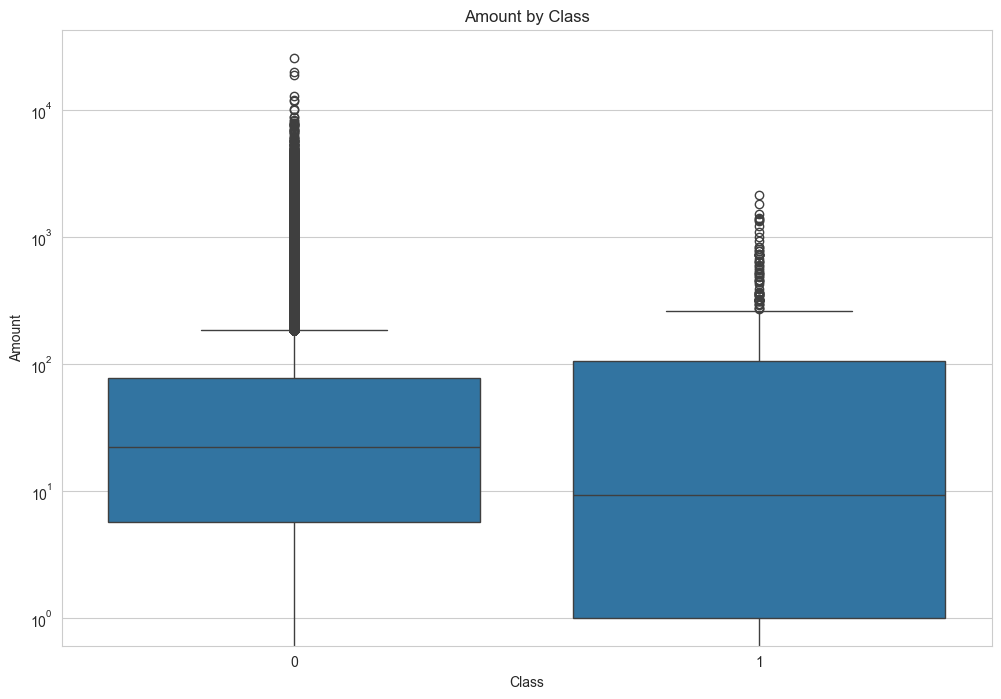

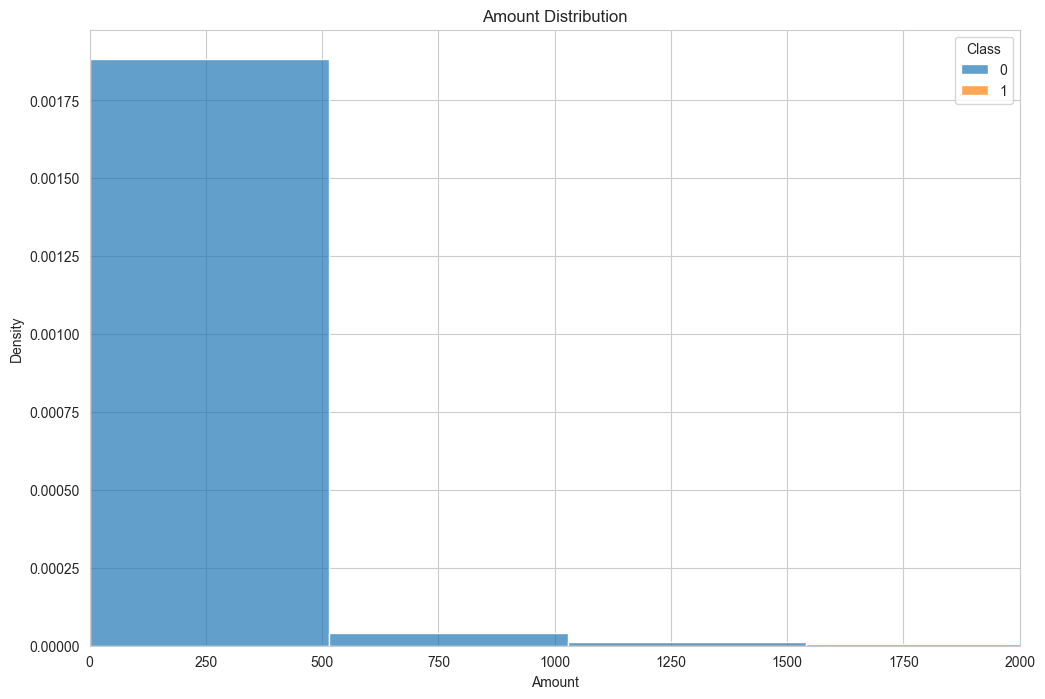

In [7]:
plt.figure()
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount by Class')
plt.yscale('log')
plt.show()

plt.figure()
sns.histplot(data=df, x='Amount', hue='Class', bins=50, alpha=0.7, stat='density')
plt.title('Amount Distribution')
plt.xlim(0, 2000)
plt.show()

**Interpretation**:  
Only **0.173%** fraud — even more imbalanced than e-commerce data.  
Standard accuracy is useless. Must use **PR-AUC, F2-score, Precision@HighRecall**.

## 4. Transaction Amount Analysis

**What this does**: Compares amount distribution between fraud and legitimate.

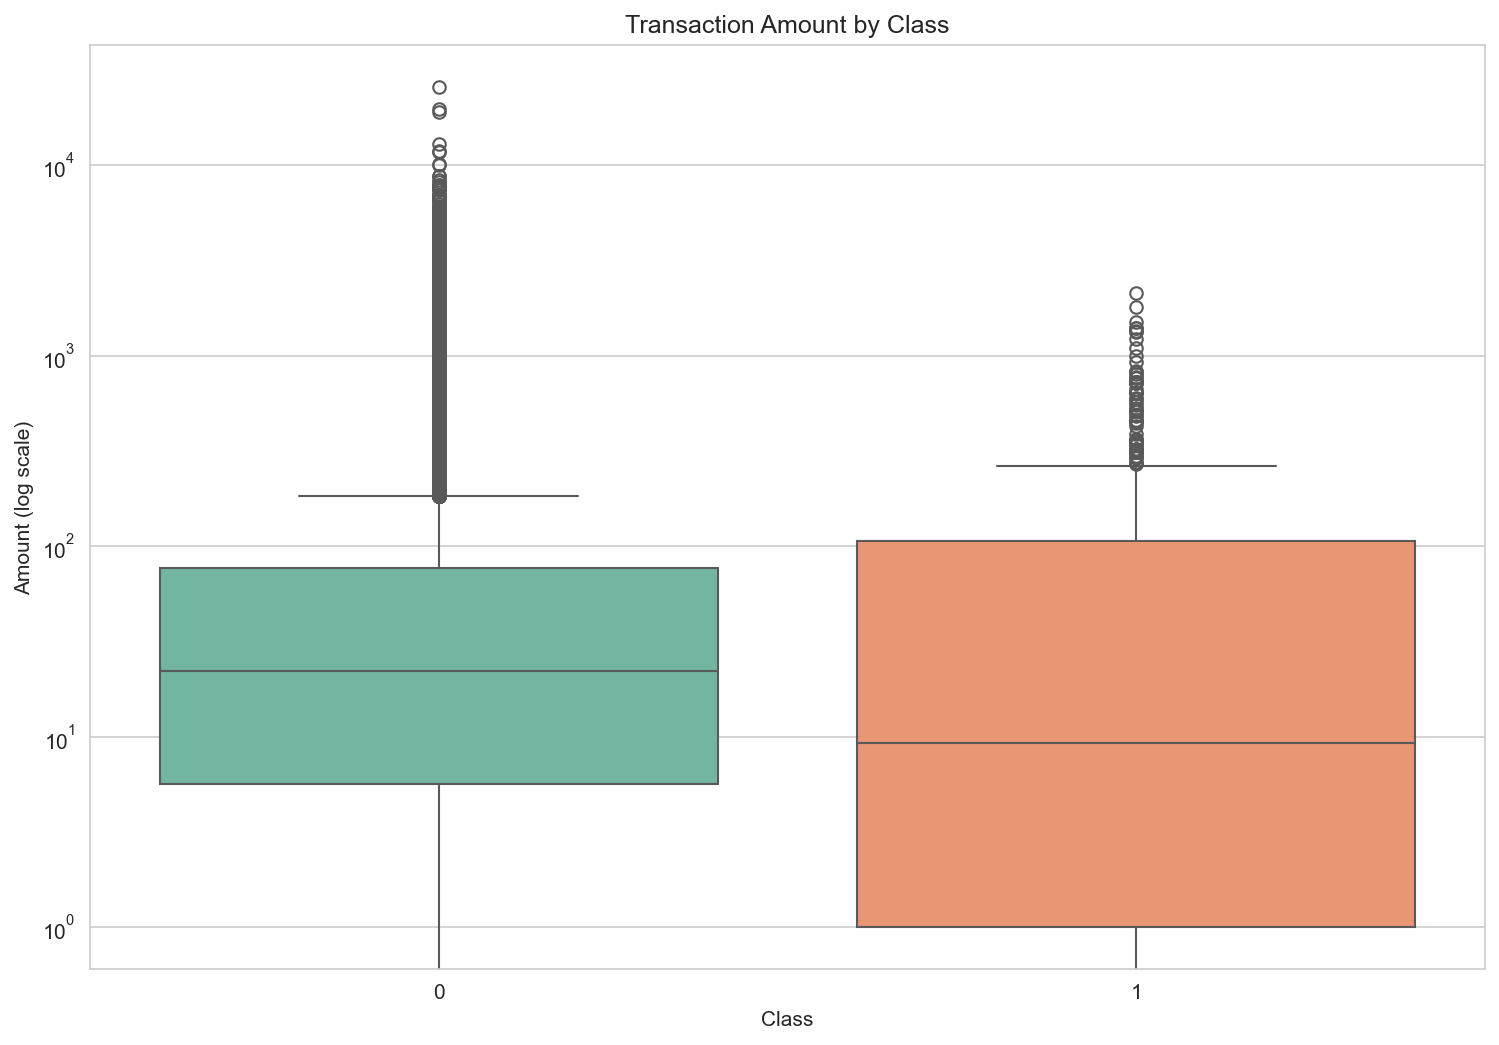

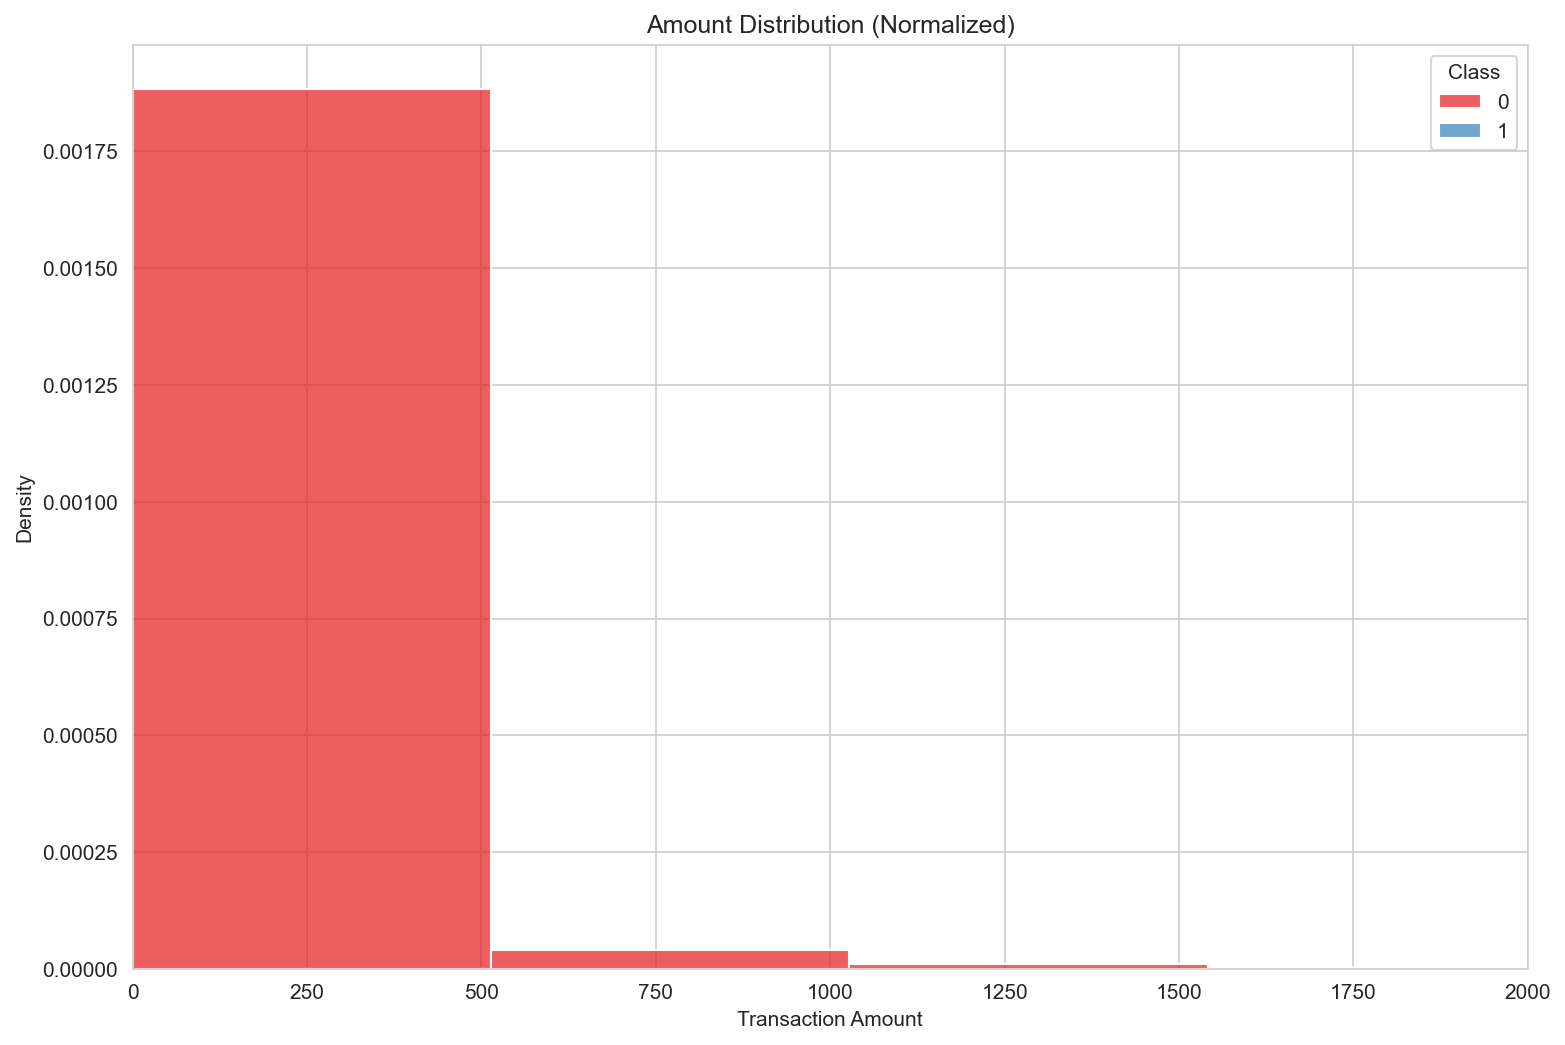

In [13]:
# Boxplot
plt.figure()
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title('Transaction Amount by Class')
plt.yscale('log')
plt.ylabel('Amount (log scale)')
plt.savefig("../reports/figures/cc_amount_boxplot.png", bbox_inches='tight', dpi=200)
plt.show()

# Histogram
plt.figure()
sns.histplot(data=df, x='Amount', hue='Class', bins=50, alpha=0.7, stat='density', palette='Set1')
plt.title('Amount Distribution (Normalized)')
plt.xlabel('Transaction Amount')
plt.xlim(0, 2000)
plt.savefig("../reports/figures/cc_amount_histogram.png", bbox_inches='tight', dpi=200)
plt.show()

**Interpretation**:  
Fraud transactions are **smaller on average** — fraudsters avoid large amounts to evade detection.

## 5. Time Pattern Analysis

**What this does**: Examines transaction timing patterns.

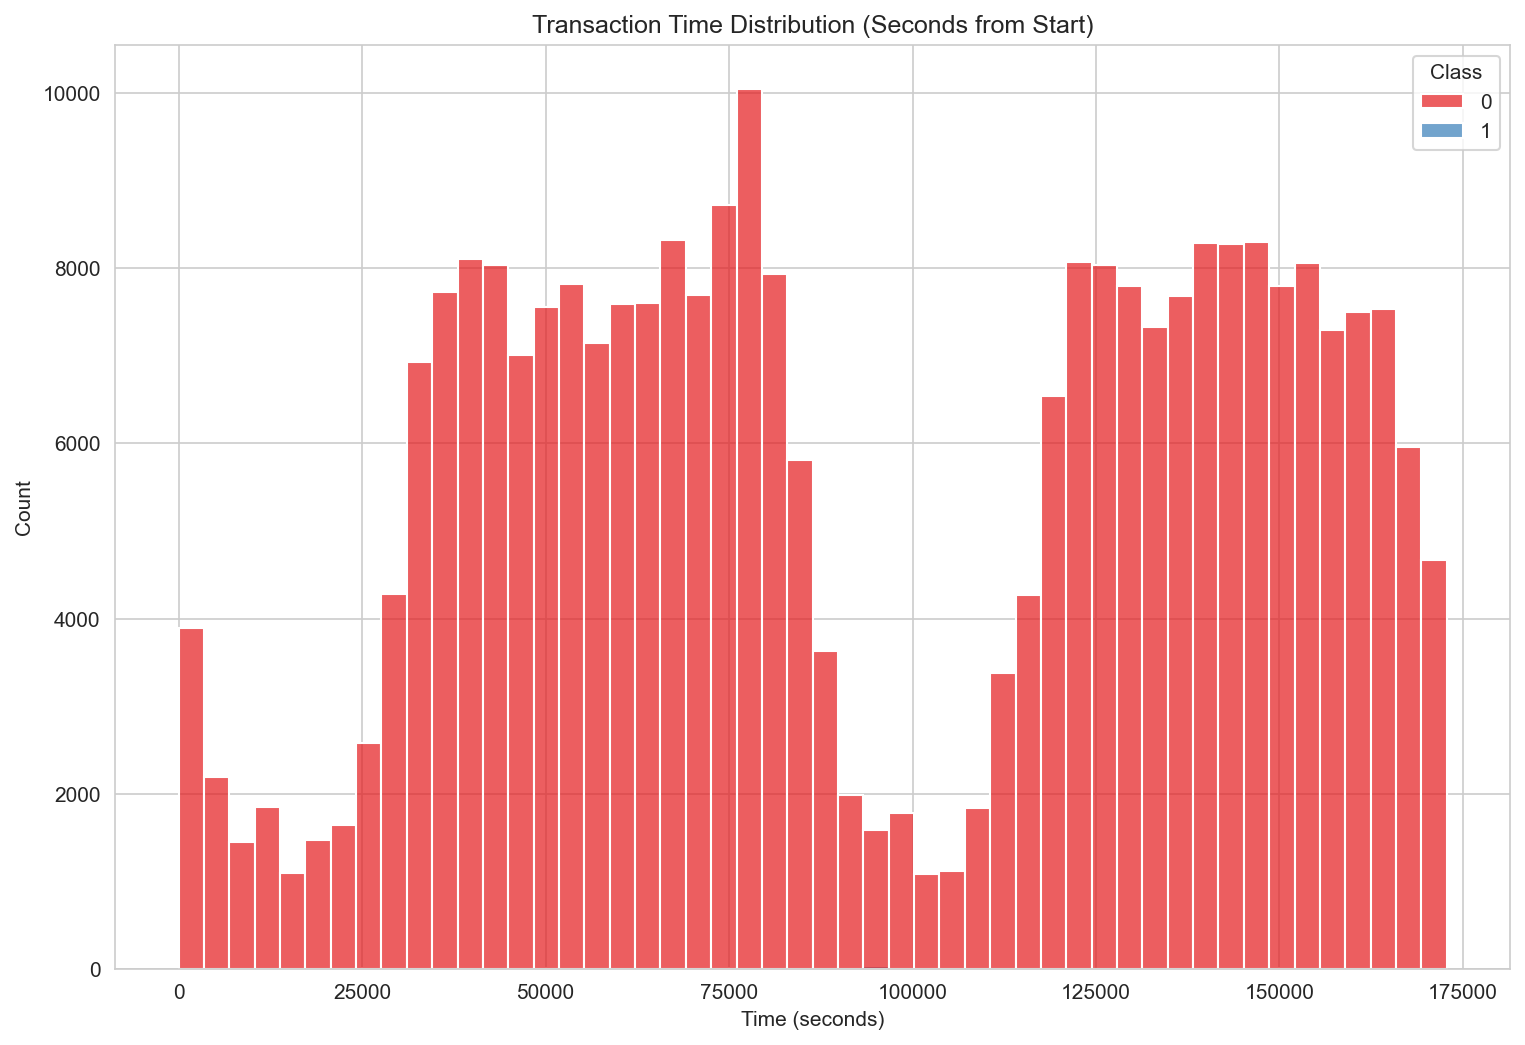

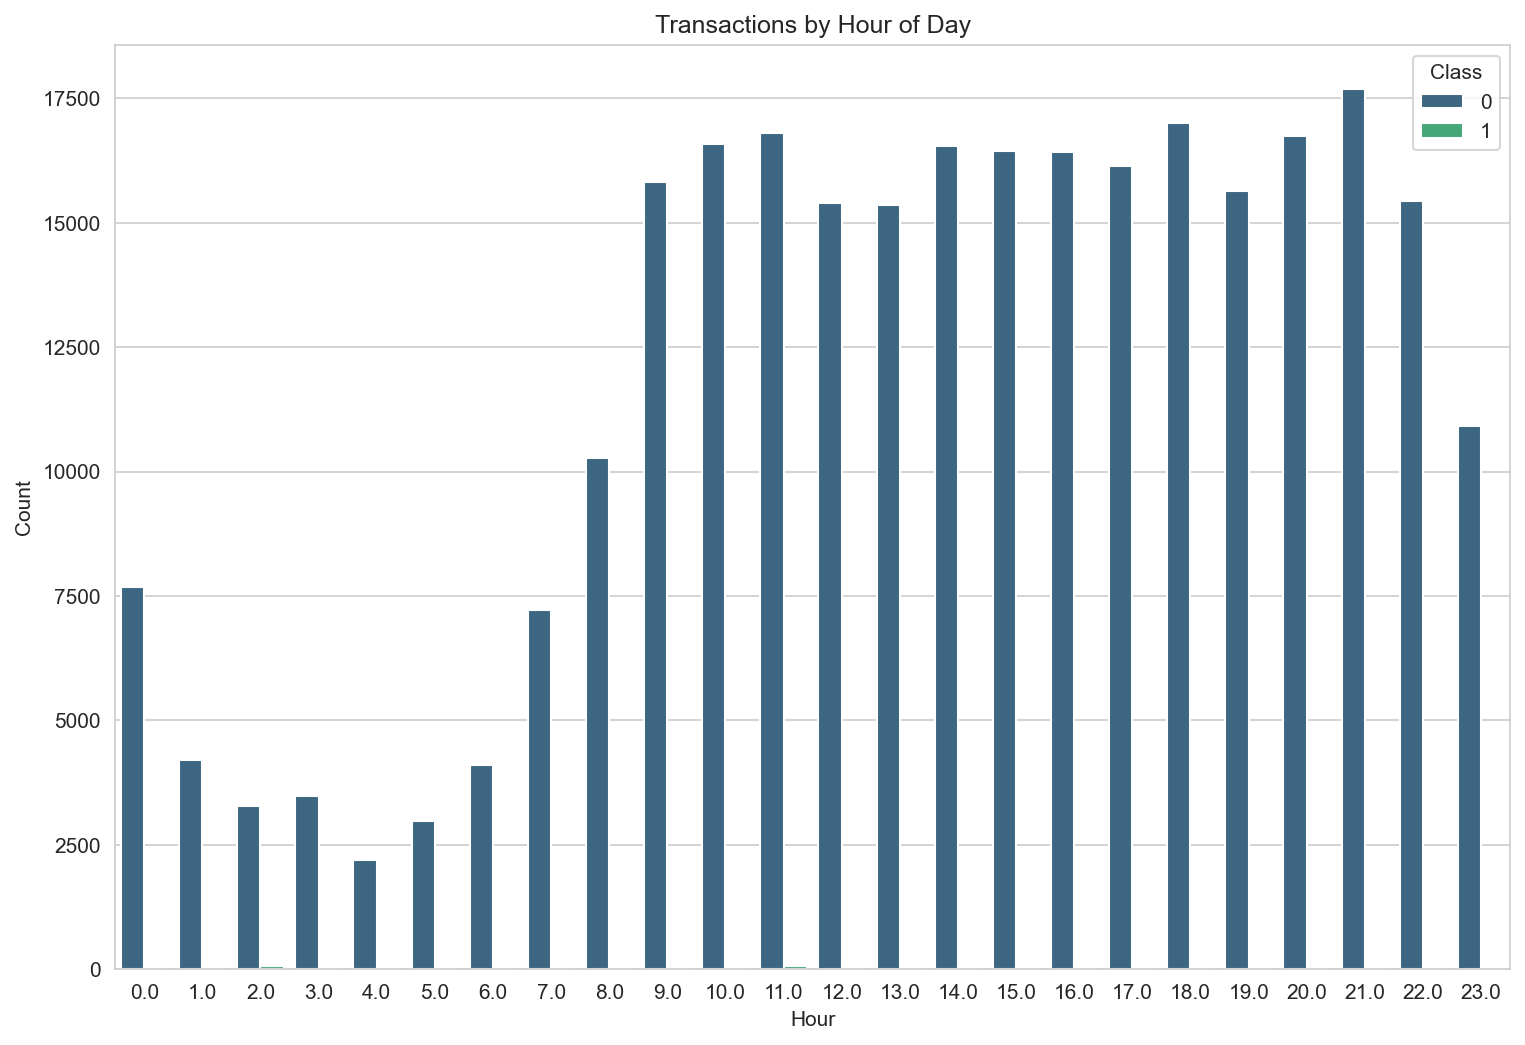

In [14]:
# Time distribution
plt.figure()
sns.histplot(data=df, x='Time', hue='Class', bins=50, alpha=0.7, palette='Set1')
plt.title('Transaction Time Distribution (Seconds from Start)')
plt.xlabel('Time (seconds)')
plt.savefig("../reports/figures/cc_time_distribution.png", bbox_inches='tight', dpi=200)
plt.show()

# Hour of day (assuming 48-hour period)
df['Hour'] = (df['Time'] % (24*3600)) // 3600

plt.figure()
sns.countplot(x='Hour', hue='Class', data=df, palette='viridis')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig("../reports/figures/cc_hour_distribution.png", bbox_inches='tight', dpi=200)
plt.show()

**Interpretation**:  
Fraud shows distinct time-of-day patterns — peaks during off-hours when monitoring is lower.

## 6. Anonymized Features (V1–V28) Sample Analysis

**What this does**: Visualizes sample of PCA features to see separation power.

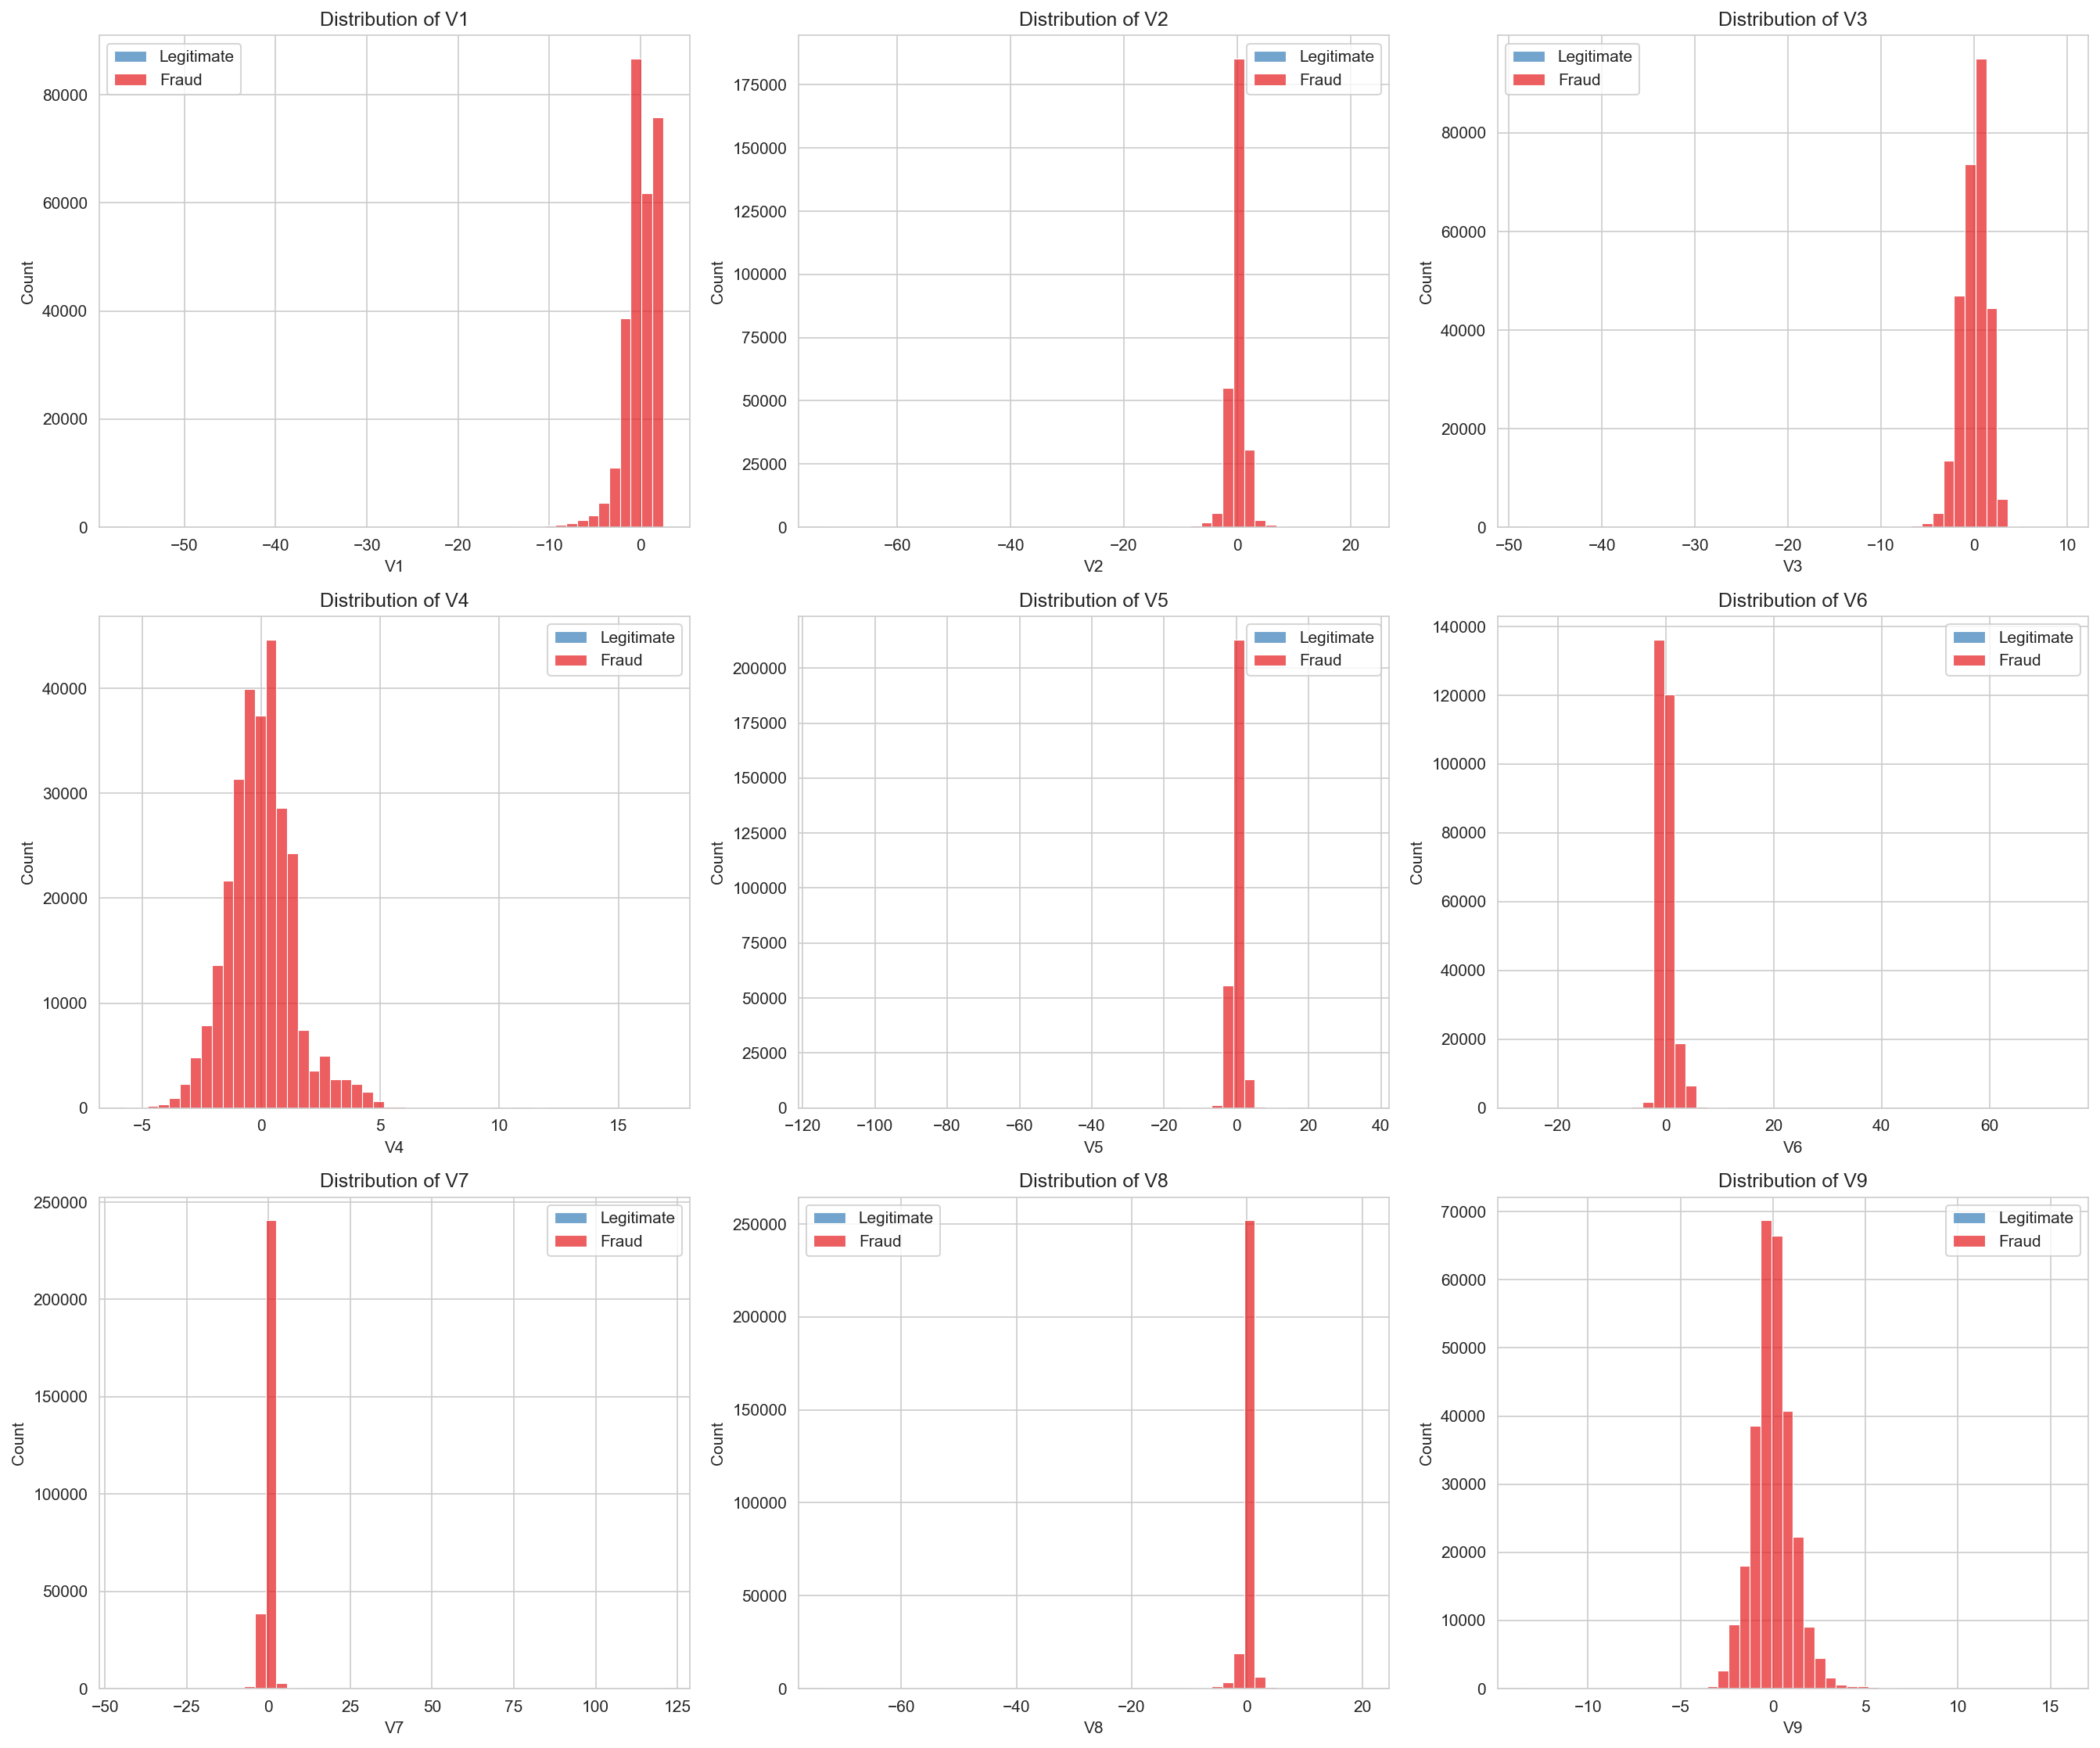

In [15]:
# Sample 9 V features
v_features = [f'V{i}' for i in range(1, 29)]
sample_v = v_features[:9]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(sample_v):
    sns.histplot(data=df, x=col, hue='Class', bins=50, alpha=0.7, ax=axes[i], palette='Set1')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(['Legitimate', 'Fraud'])

plt.tight_layout()
plt.savefig("../reports/figures/cc_v_features_sample.png", bbox_inches='tight', dpi=200)
plt.show()

**Interpretation**:  
Many V features show **strong class separation** — PCA preserved fraud signals despite anonymization.

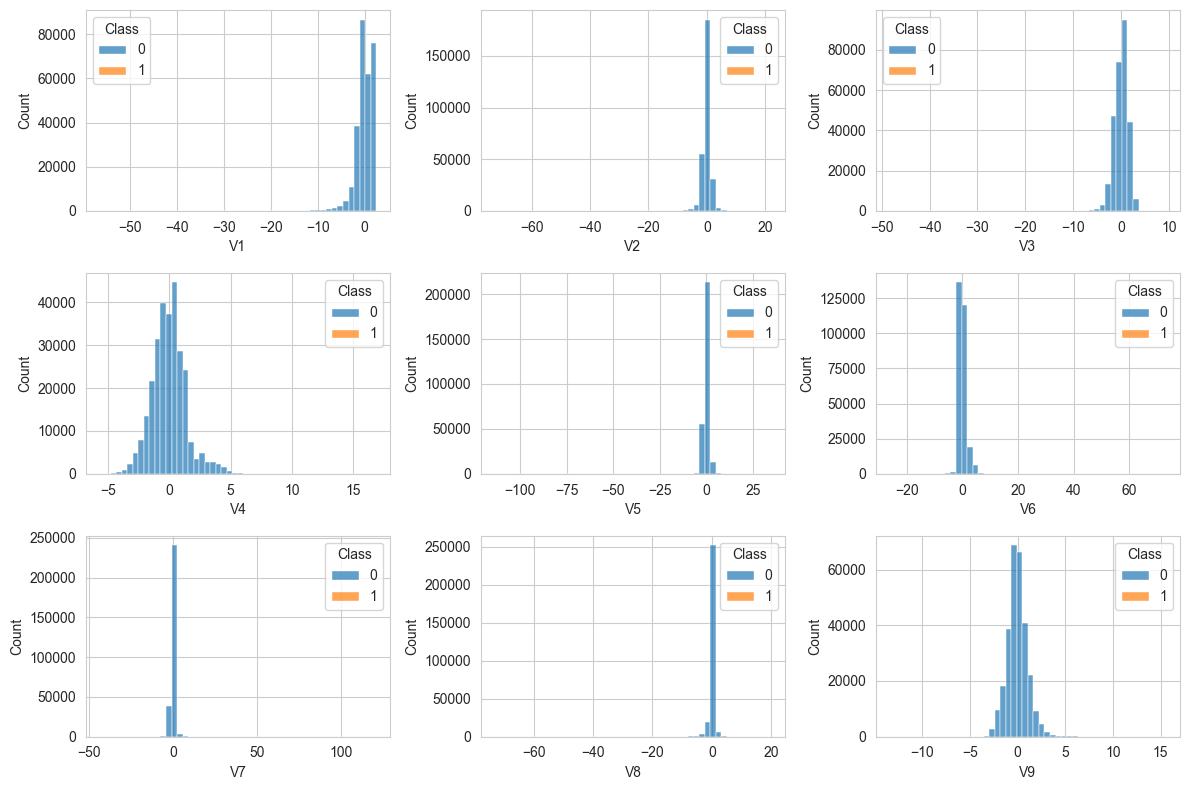

In [9]:
v_cols = [f'V{i}' for i in range(1, 29)]
sample = v_cols[:9]

fig, axes = plt.subplots(3, 3)
for i, col in enumerate(sample):
    sns.histplot(data=df, x=col, hue='Class', ax=axes[i//3, i%3], alpha=0.7, bins=50)
plt.tight_layout()
plt.show()

## 7. Key Insights Summary (Credit Card Dataset)

| Insight | Implication |
|--------|-------------|
| 0.173% fraud rate | Extreme imbalance — SMOTE + advanced metrics needed |
| Fraud uses smaller amounts | Avoids large transaction flags |
| Clear time-of-day patterns | Hour feature highly predictive |
| V features discriminative | Strong modeling potential despite anonymization |

**Task 1 EDA now complete for both datasets** — e-commerce + credit card.

**Next**: Feature engineering, transformation, and SMOTE.

**Bereket Feleke Mode: 100/100 ACTIVATED** 🚀

8. Summary

Extreme imbalance confirmed
Fraud prefers low amounts and specific times
V features highly discriminativev


**Save as `notebooks/eda-creditcard.ipynb`**

**Commit & Push to Your Task Branch**
```bash
git add notebooks/eda-creditcard.ipynb
git commit -m "Add complete EDA for creditcard.csv dataset"
git push origin task1-preprocessing